# Examples usage of logistic regression classifier on a MNIST data

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [10]:
from miniml import load_mnist
from miniml import LogisticRegressionClassifier

In [11]:
mnist_path: str = "/home/filip/Data/mnist"
train_images, train_labels = load_mnist("/home/filip/Data/mnist", "train")
test_images, test_labels = load_mnist("/home/filip/Data/mnist", "test")

train_images = train_images.astype(np.float32)
test_images = test_images.astype(np.float32)

In [12]:
from numpy.random import RandomState
rnd = RandomState(42)

In [13]:
def sample(X, y, n):
    indices = rnd.choice(X.shape[0], n)
    return X[indices], y[indices]

In [14]:
train_sample, y_train_sample = sample(train_images, train_labels, 10000)

train_sample /= 255
test_images /= 255

In [15]:
def predict(model, test_images, batch_size=256):
    n_batches = test_images.shape[0] // batch_size
    if test_images.shape[0] % batch_size != 0:
        n_batches += 1

    y_pred = np.empty(test_images.shape[0])
    for i in tqdm(range(n_batches)):
        start = i * batch_size
        end = start + batch_size
        y_pred[start:end] = model.predict(test_images[start:end])
    return y_pred

In [16]:
lr = LogisticRegressionClassifier(batch_size=64, n_epochs=50)
lr.fit(train_sample, y_train_sample)

Epoch 0/50 - Training loss: 10.8559 - Validation loss: 10.6024
Epoch 1/50 - Training loss: 8.4962 - Validation loss: 8.2621
Epoch 2/50 - Training loss: 7.0826 - Validation loss: 6.8635
Epoch 3/50 - Training loss: 6.0377 - Validation loss: 5.8425


Epoch 4/50 - Training loss: 5.2586 - Validation loss: 5.0985
Epoch 5/50 - Training loss: 4.6606 - Validation loss: 4.5380
Epoch 6/50 - Training loss: 4.1896 - Validation loss: 4.1015
Epoch 7/50 - Training loss: 3.8118 - Validation loss: 3.7517
Epoch 8/50 - Training loss: 3.5024 - Validation loss: 3.4620
Epoch 9/50 - Training loss: 3.2450 - Validation loss: 3.2226
Epoch 10/50 - Training loss: 3.0269 - Validation loss: 3.0196
Epoch 11/50 - Training loss: 2.8393 - Validation loss: 2.8451
Epoch 12/50 - Training loss: 2.6763 - Validation loss: 2.6930
Epoch 13/50 - Training loss: 2.5337 - Validation loss: 2.5609
Epoch 14/50 - Training loss: 2.4081 - Validation loss: 2.4427
Epoch 15/50 - Training loss: 2.2969 - Validation loss: 2.3402
Epoch 16/50 - Training loss: 2.1977 - Validation loss: 2.2474
Epoch 17/50 - Training loss: 2.1087 - Validation loss: 2.1626
Epoch 18/50 - Training loss: 2.0288 - Validation loss: 2.0877
Epoch 19/50 - Training loss: 1.9565 - Validation loss: 2.0191
Epoch 20/50 - 

In [17]:
y_pred = predict(lr, test_images)
print(np.mean(y_pred == test_labels))

100%|██████████| 40/40 [00:00<00:00, 897.45it/s]

0.7712


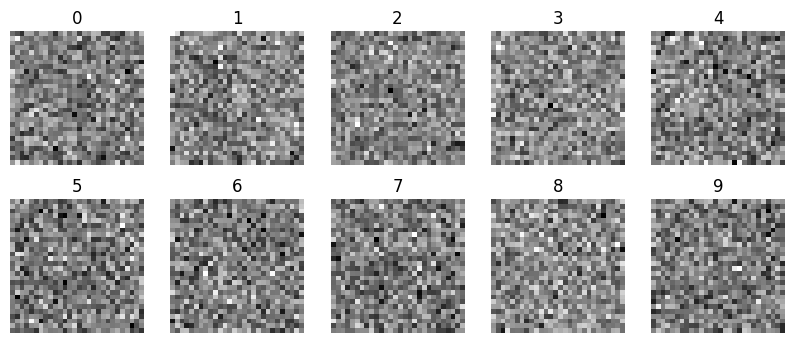

In [18]:
# Plot the weights of the model.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(lr.W[i].reshape(28, 28), cmap="gray")
    ax.set_title(i)
    ax.axis("off")
plt.show()

In [19]:
lr = LogisticRegressionClassifier(batch_size=64, n_epochs=50, weight_decay=0.1)
lr.fit(train_sample, y_train_sample)

Epoch 0/50 - Training loss: 10.5904 - Validation loss: 10.8766
Epoch 1/50 - Training loss: 7.5041 - Validation loss: 7.8124
Epoch 2/50 - Training loss: 5.6473 - Validation loss: 5.8850
Epoch 3/50 - Training loss: 4.2688 - Validation loss: 4.4417
Epoch 4/50 - Training loss: 3.2385 - Validation loss: 3.3574
Epoch 5/50 - Training loss: 2.4935 - Validation loss: 2.5723
Epoch 6/50 - Training loss: 1.9655 - Validation loss: 2.0157
Epoch 7/50 - Training loss: 1.5930 - Validation loss: 1.6193
Epoch 8/50 - Training loss: 1.3330 - Validation loss: 1.3420
Epoch 9/50 - Training loss: 1.1527 - Validation loss: 1.1512
Epoch 10/50 - Training loss: 1.0272 - Validation loss: 1.0184
Epoch 11/50 - Training loss: 0.9408 - Validation loss: 0.9276
Epoch 12/50 - Training loss: 0.8818 - Validation loss: 0.8658
Epoch 13/50 - Training loss: 0.8411 - Validation loss: 0.8236
Epoch 14/50 - Training loss: 0.8142 - Validation loss: 0.7966
Epoch 15/50 - Training loss: 0.7958 - Validation loss: 0.7776
Epoch 16/50 - Tr

In [20]:
y_pred = predict(lr, test_images)
print(np.mean(y_pred == test_labels))

100%|██████████| 40/40 [00:00<00:00, 935.01it/s]

0.8712


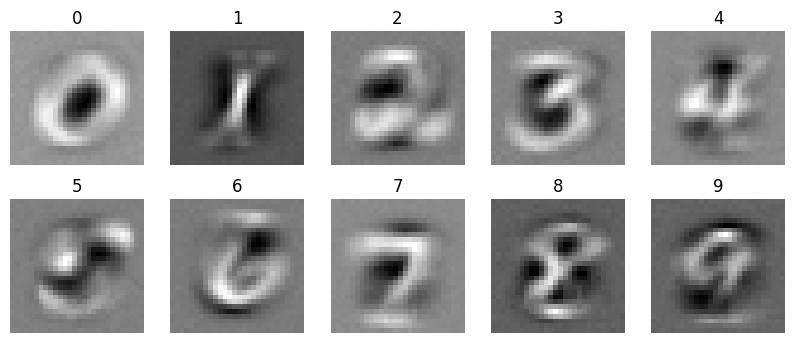

In [21]:
# Plot the weights of the model.
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(lr.W[i].reshape(28, 28), cmap="gray")
    ax.set_title(i)
    ax.axis("off")
plt.show()